In [ ]:
# Welcome to your new notebook
# Type here in the cell editor to add code!


In [1]:
# Use pip to install libraries
%pip install imblearn

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 8, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 22.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [184]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc = {'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import pandas as pd
import itertools
import mlflow
# Import the required libraries for model training
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 433, Finished, Available)

In [101]:
delta_table_path = "Tables/CanadaPRScores" #fill in your delta table path 
Quati_df = spark.read.format("delta").load(delta_table_path) 
display(Quati_df)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 158, Finished, Available)

SynapseWidget(Synapse.DataFrame, fd421876-ee82-49dc-b55b-4fe33a6c484a)

In [102]:
delta_table_path = "Tables/CanadaPRQualitativeAnalysis" #fill in your delta table path 
qual_df = spark.read.format("delta").load(delta_table_path) 
display(qual_df)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 159, Finished, Available)

SynapseWidget(Synapse.DataFrame, 817e08a5-e1fb-45c8-8770-c7e869cc4337)

In [103]:
Quati_df = Quati_df.toPandas()

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 160, Finished, Available)

In [104]:
qual_df = qual_df.toPandas()

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 161, Finished, Available)

In [105]:
column_names = qual_df.columns.tolist()

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 162, Finished, Available)

In [106]:
column_names = [
 'Canadian_Government_Sentiment_Score',
 'Economic_need_Score',
 'Frequency_Score',
 'Goal_of_Canadian_government_Score',
 'Priority_Score',
 'Provincial_need_Score',
 'Recent_Score']


StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 163, Finished, Available)

In [107]:
qual_df = qual_df.drop_duplicates(subset='Round_Type')

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 164, Finished, Available)

In [108]:
for column in column_names:
    Quati_df[column] = None

Quati_df

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 165, Finished, Available)

,URL_of_Draw_Details,Draw_Date,Round_Type,Invitations_Issued,CRS_Cutoff_Score,Canadian_Government_Sentiment_Score,Economic_need_Score,Frequency_Score,Goal_of_Canadian_government_Score,Priority_Score,Provincial_need_Score,Recent_Score
0,http://www.canada.ca/content/canadasite/en/imm...,2024-02-29,French language proficiency (2024-1),2500,336,None,None,None,None,None,None,None
1,http://www.canada.ca/content/canadasite/en/imm...,2024-02-16,Agriculture and agri-food occupations (2023-1),150,437,None,None,None,None,None,None,None
2,http://www.canada.ca/content/canadasite/en/imm...,2024-02-14,Healthcare occupations (2023-1),3500,422,None,None,None,None,None,None,None
3,http://www.canada.ca/content/canadasite/en/imm...,2024-02-01,French language proficiency (2023-1),7000,365,None,None,None,None,None,None,None
4,http://www.canada.ca/content/canadasite/en/imm...,2023-12-21,Agriculture and agri-food occupations (2023-1),400,386,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
283,http://www.canada.ca/en/immigration-refugees-c...,2018-11-14,General,3900,449,None,None,None,None,None,None,None
284,http://www.canada.ca/en/immigration-refugees-c...,2018-10-29,General,3900,442,None,None,None,None,None,None,None
285,http://www.canada.ca/en/immigration-refugees-c...,2018-10-15,General,3900,440,None,None,None,None,None,None,None
286,http://www.canada.ca/en/immigration-refugees-c...,2018-10-03,General,3900,445,None,None,None,None,None,None,None


In [109]:
for column in column_names:
    # Create a mapping Series
    mapping = qual_df.set_index('Round_Type')[column]

    # Fill missing values in df1['sentiment score'] based on df2
    Quati_df[column] = Quati_df[column].fillna(Quati_df['Round_Type'].map(mapping))


StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 166, Finished, Available)

In [110]:
Quati_df

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 167, Finished, Available)

,URL_of_Draw_Details,Draw_Date,Round_Type,Invitations_Issued,CRS_Cutoff_Score,Canadian_Government_Sentiment_Score,Economic_need_Score,Frequency_Score,Goal_of_Canadian_government_Score,Priority_Score,Provincial_need_Score,Recent_Score
0,http://www.canada.ca/content/canadasite/en/imm...,2024-02-29,French language proficiency (2024-1),2500,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.canada.ca/content/canadasite/en/imm...,2024-02-16,Agriculture and agri-food occupations (2023-1),150,437,8.0,9.0,1.0,8.0,6.0,7.0,8.0
2,http://www.canada.ca/content/canadasite/en/imm...,2024-02-14,Healthcare occupations (2023-1),3500,422,8.0,9.0,2.0,8.0,7.0,8.0,8.0
3,http://www.canada.ca/content/canadasite/en/imm...,2024-02-01,French language proficiency (2023-1),7000,365,8.0,7.0,3.0,7.0,6.0,8.0,9.0
4,http://www.canada.ca/content/canadasite/en/imm...,2023-12-21,Agriculture and agri-food occupations (2023-1),400,386,8.0,9.0,1.0,8.0,6.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
283,http://www.canada.ca/en/immigration-refugees-c...,2018-11-14,General,3900,449,7.0,9.0,7.0,8.0,5.0,6.0,7.0
284,http://www.canada.ca/en/immigration-refugees-c...,2018-10-29,General,3900,442,7.0,9.0,7.0,8.0,5.0,6.0,7.0
285,http://www.canada.ca/en/immigration-refugees-c...,2018-10-15,General,3900,440,7.0,9.0,7.0,8.0,5.0,6.0,7.0
286,http://www.canada.ca/en/immigration-refugees-c...,2018-10-03,General,3900,445,7.0,9.0,7.0,8.0,5.0,6.0,7.0


In [111]:
#check for null values
null_values = Quati_df[Quati_df.isnull().any(axis=1)]

null_values


StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 168, Finished, Available)

,URL_of_Draw_Details,Draw_Date,Round_Type,Invitations_Issued,CRS_Cutoff_Score,Canadian_Government_Sentiment_Score,Economic_need_Score,Frequency_Score,Goal_of_Canadian_government_Score,Priority_Score,Provincial_need_Score,Recent_Score
0,http://www.canada.ca/content/canadasite/en/imm...,2024-02-29,French language proficiency (2024-1),2500,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
for column in column_names:
    #fill missing values
    mask1 = qual_df['Round_Type'] == 'French language proficiency (2023-1)'

    # Get the 'sentiment' values from df1
    column_value = qual_df.loc[mask1, column]

    # Create a boolean mask for the rows in df2 where 'A' is 'french anti'
    mask2 = Quati_df['Round_Type'] == 'French language proficiency (2024-1)'

    # Assign the 'sentiment' values from df1 to df2
    Quati_df.loc[mask2, column] = column_value.values

Quati_df

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 169, Finished, Available)

,URL_of_Draw_Details,Draw_Date,Round_Type,Invitations_Issued,CRS_Cutoff_Score,Canadian_Government_Sentiment_Score,Economic_need_Score,Frequency_Score,Goal_of_Canadian_government_Score,Priority_Score,Provincial_need_Score,Recent_Score
0,http://www.canada.ca/content/canadasite/en/imm...,2024-02-29,French language proficiency (2024-1),2500,336,8.0,7.0,3.0,7.0,6.0,8.0,9.0
1,http://www.canada.ca/content/canadasite/en/imm...,2024-02-16,Agriculture and agri-food occupations (2023-1),150,437,8.0,9.0,1.0,8.0,6.0,7.0,8.0
2,http://www.canada.ca/content/canadasite/en/imm...,2024-02-14,Healthcare occupations (2023-1),3500,422,8.0,9.0,2.0,8.0,7.0,8.0,8.0
3,http://www.canada.ca/content/canadasite/en/imm...,2024-02-01,French language proficiency (2023-1),7000,365,8.0,7.0,3.0,7.0,6.0,8.0,9.0
4,http://www.canada.ca/content/canadasite/en/imm...,2023-12-21,Agriculture and agri-food occupations (2023-1),400,386,8.0,9.0,1.0,8.0,6.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
283,http://www.canada.ca/en/immigration-refugees-c...,2018-11-14,General,3900,449,7.0,9.0,7.0,8.0,5.0,6.0,7.0
284,http://www.canada.ca/en/immigration-refugees-c...,2018-10-29,General,3900,442,7.0,9.0,7.0,8.0,5.0,6.0,7.0
285,http://www.canada.ca/en/immigration-refugees-c...,2018-10-15,General,3900,440,7.0,9.0,7.0,8.0,5.0,6.0,7.0
286,http://www.canada.ca/en/immigration-refugees-c...,2018-10-03,General,3900,445,7.0,9.0,7.0,8.0,5.0,6.0,7.0


In [113]:
#check for null values
null_values = df.isnull().any().any()

null_values

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 170, Finished, Available)

False

In [114]:
display(Quati_df, summary=True)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 171, Finished, Available)

SynapseWidget(Synapse.DataFrame, eed3ec76-7a58-4fbb-b67c-12bf05db2b9c)

In [120]:
# Code generated by Data Wrangler for pandas DataFrame


def clean_data(Quati_df):
    # Change column type to datetime64[ns] for column: 'Draw_Date'
    Quati_df = Quati_df.astype({'Draw_Date': 'datetime64[ns]'})
    # Scale columns 'Recent_Score', 'Provincial_need_Score' and 5 other columns between 0 and 1
    new_min, new_max = 0, 1
    old_min, old_max = Quati_df['Recent_Score'].min(), Quati_df['Recent_Score'].max()
    Quati_df['Recent_Score'] = (Quati_df['Recent_Score'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = Quati_df['Provincial_need_Score'].min(), Quati_df['Provincial_need_Score'].max()
    Quati_df['Provincial_need_Score'] = (Quati_df['Provincial_need_Score'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = Quati_df['Priority_Score'].min(), Quati_df['Priority_Score'].max()
    Quati_df['Priority_Score'] = (Quati_df['Priority_Score'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = Quati_df['Goal_of_Canadian_government_Score'].min(), Quati_df['Goal_of_Canadian_government_Score'].max()
    Quati_df['Goal_of_Canadian_government_Score'] = (Quati_df['Goal_of_Canadian_government_Score'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = Quati_df['Frequency_Score'].min(), Quati_df['Frequency_Score'].max()
    Quati_df['Frequency_Score'] = (Quati_df['Frequency_Score'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = Quati_df['Economic_need_Score'].min(), Quati_df['Economic_need_Score'].max()
    Quati_df['Economic_need_Score'] = (Quati_df['Economic_need_Score'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = Quati_df['Canadian_Government_Sentiment_Score'].min(), Quati_df['Canadian_Government_Sentiment_Score'].max()
    Quati_df['Canadian_Government_Sentiment_Score'] = (Quati_df['Canadian_Government_Sentiment_Score'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    # Change column type to float16 for column: 'Canadian_Government_Sentiment_Score'
    Quati_df = Quati_df.astype({'Canadian_Government_Sentiment_Score': 'float16'})
    # Change column type to float16 for column: 'Economic_need_Score'
    Quati_df = Quati_df.astype({'Economic_need_Score': 'float16'})
    # Change column type to float16 for columns: 'Frequency_Score', 'Goal_of_Canadian_government_Score' and 3 other columns
    Quati_df = Quati_df.astype({'Frequency_Score': 'float16', 'Goal_of_Canadian_government_Score': 'float16', 'Priority_Score': 'float16', 'Provincial_need_Score': 'float16', 'Recent_Score': 'float16'})
    # One-hot encode column: 'Round_Type'
    Quati_df = pd.get_dummies(Quati_df, columns=['Round_Type'])
    # Change column type to int16 for columns: 'Invitations_Issued', 'CRS_Cutoff_Score'
    Quati_df = Quati_df.astype({'Invitations_Issued': 'int16', 'CRS_Cutoff_Score': 'int16'})
    return Quati_df

Quati_df_clean = clean_data(Quati_df.copy())
Quati_df_clean.head()

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 364, Finished, Available)

,URL_of_Draw_Details,Draw_Date,Invitations_Issued,CRS_Cutoff_Score,Canadian_Government_Sentiment_Score,Economic_need_Score,Frequency_Score,Goal_of_Canadian_government_Score,Priority_Score,Provincial_need_Score,...,Round_Type_Federal Skilled Trades,Round_Type_Federal Skilled Worker,Round_Type_French language proficiency (2023-1),Round_Type_French language proficiency (2024-1),Round_Type_General,Round_Type_Healthcare occupations (2023-1),Round_Type_Provincial Nominee Program,Round_Type_STEM occupations (2023-1),Round_Type_Trade occupations (2023-1),Round_Type_Transport occupations (2023-1)
0,http://www.canada.ca/content/canadasite/en/imm...,2024-02-29,2500,336,1.0,0.0,0.333252,0.0,0.5,0.666504,...,False,False,False,True,False,False,False,False,False,False
1,http://www.canada.ca/content/canadasite/en/imm...,2024-02-16,150,437,1.0,1.0,0.000000,1.0,0.5,0.333252,...,False,False,False,False,False,False,False,False,False,False
2,http://www.canada.ca/content/canadasite/en/imm...,2024-02-14,3500,422,1.0,1.0,0.166626,1.0,1.0,0.666504,...,False,False,False,False,False,True,False,False,False,False
3,http://www.canada.ca/content/canadasite/en/imm...,2024-02-01,7000,365,1.0,0.0,0.333252,0.0,0.5,0.666504,...,False,False,True,False,False,False,False,False,False,False
4,http://www.canada.ca/content/canadasite/en/imm...,2023-12-21,400,386,1.0,1.0,0.000000,1.0,0.5,0.333252,...,False,False,False,False,False,False,False,False,False,False


In [121]:
#check the types in a dataframe
column_types = Quati_df_clean.dtypes

print(column_types)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 365, Finished, Available)

URL_of_Draw_Details                                                  object
Draw_Date                                                    datetime64[ns]
Invitations_Issued                                                    int16
CRS_Cutoff_Score                                                      int16
Canadian_Government_Sentiment_Score                                 float16
Economic_need_Score                                                 float16
Frequency_Score                                                     float16
Goal_of_Canadian_government_Score                                   float16
Priority_Score                                                      float16
Provincial_need_Score                                               float16
Recent_Score                                                        float16
Round_Type_Agriculture and agri-food occupations (2023-1)              bool
Round_Type_Canadian Experience Class                                   bool
Round_Type_F

In [122]:
# Determine the dependent (target) attribute
dependent_variable_name = "CRS_Cutoff_Score"
print(dependent_variable_name)
print("\n")
# Determine the categorical attributes
categorical_variables = [col for col in Quati_df_clean.columns if Quati_df_clean[col].dtype == "bool"]
print(categorical_variables)
print("\n")
# Determine the numerical attributes
numeric_variables = [col for col in Quati_df_clean.columns if Quati_df_clean[col].dtype == "float16" 
                      or Quati_df_clean[col].dtype == "int16" and col not in "CRS_Cutoff_Score"]
print("\n")
print(numeric_variables)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 366, Finished, Available)

CRS_Cutoff_Score


['Round_Type_Agriculture and agri-food occupations (2023-1)', 'Round_Type_Canadian Experience Class', 'Round_Type_Federal Skilled Trades', 'Round_Type_Federal Skilled Worker', 'Round_Type_French language proficiency (2023-1)', 'Round_Type_French language proficiency (2024-1)', 'Round_Type_General', 'Round_Type_Healthcare occupations (2023-1)', 'Round_Type_Provincial Nominee Program', 'Round_Type_STEM occupations (2023-1)', 'Round_Type_Trade occupations (2023-1)', 'Round_Type_Transport occupations (2023-1)']




['Invitations_Issued', 'Canadian_Government_Sentiment_Score', 'Economic_need_Score', 'Frequency_Score', 'Goal_of_Canadian_government_Score', 'Priority_Score', 'Provincial_need_Score', 'Recent_Score']


StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 367, Finished, Available)

/tmp/ipykernel_7587/3277985691.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


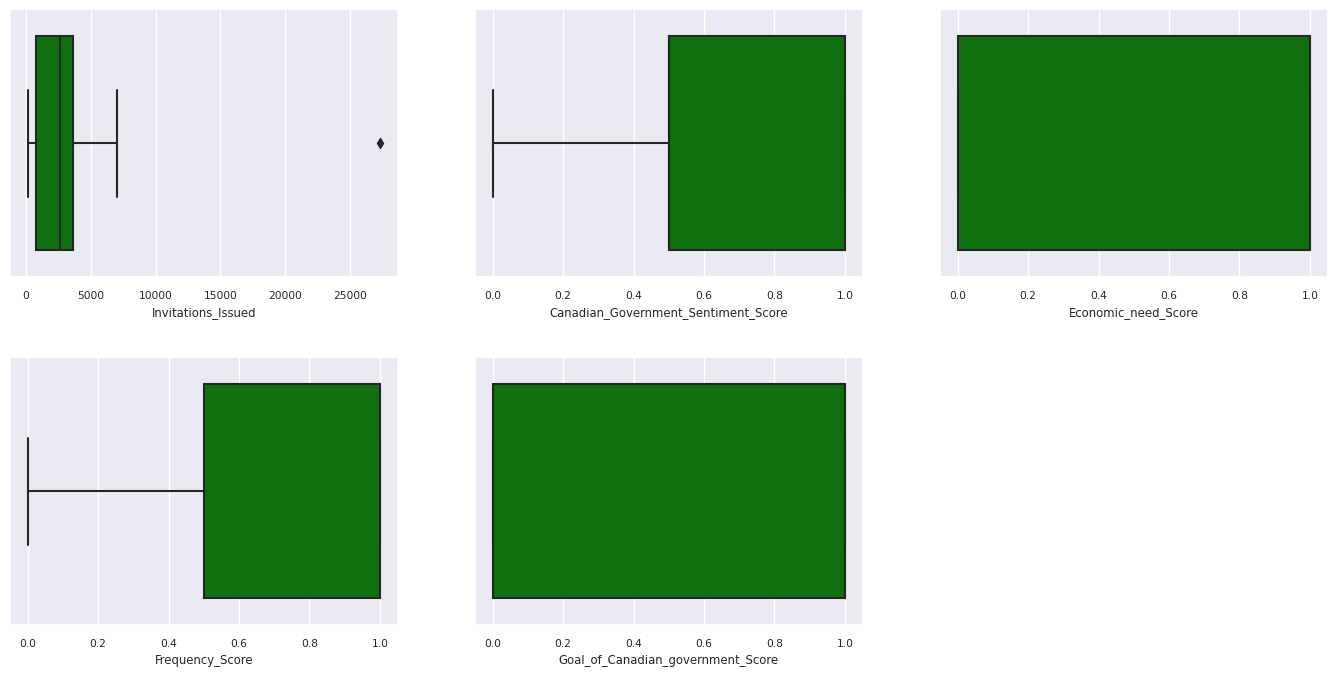

In [123]:
df_num_cols = Quati_df_clean[numeric_variables]
sns.set(font_scale = 0.7) 
fig, axes = plt.subplots(nrows = 2, ncols = 3, gridspec_kw =  dict(hspace=0.3), figsize = (17,8))
fig.tight_layout()
for ax,col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x = df_num_cols[col], color='green', ax = ax)
# fig.suptitle('visualize and compare the distribution and central tendency of numerical attributes', color = 'k', fontsize = 12)
fig.delaxes(axes[1,2])

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 368, Finished, Available)

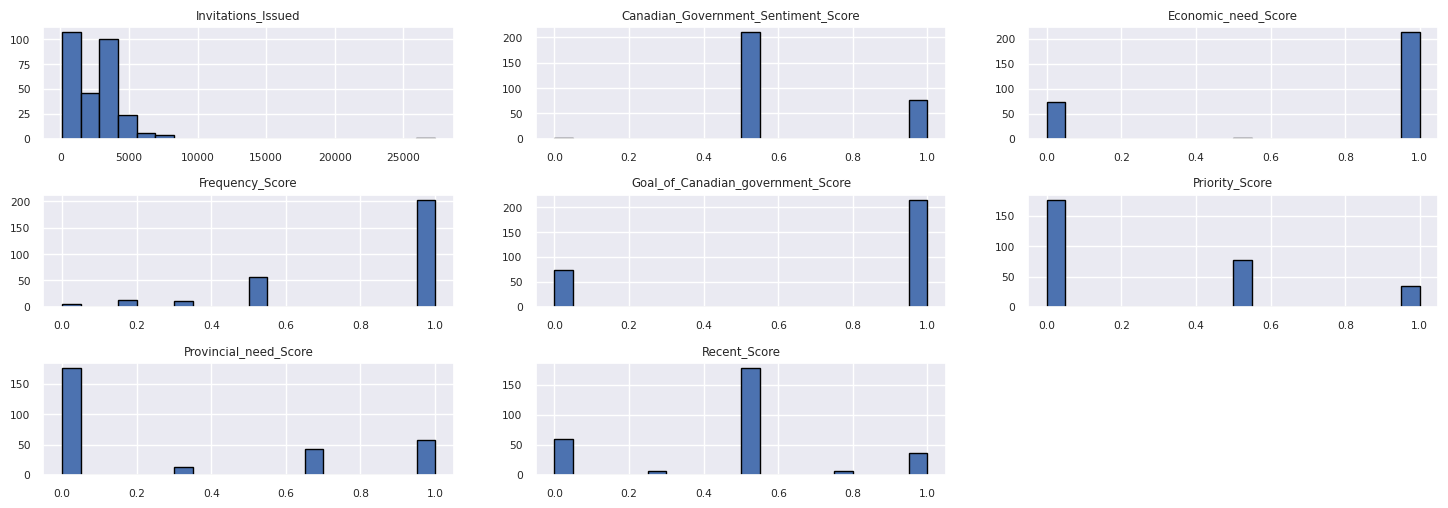

In [124]:
columns = df_num_cols.columns[: len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 8)
length = len(columns)
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length // 2), 3, j+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    df_num_cols[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i)
# fig = fig.suptitle('distribution of numerical attributes', color = 'r' ,fontsize = 14)
plt.show()

In [130]:
# Create a PySpark DataFrame from pandas
sparkDF=spark.createDataFrame(Quati_df_clean)


StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 374, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:428: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion from Arrow: halffloat
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


In [132]:
display(sparkDF)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 376, Finished, Available)

SynapseWidget(Synapse.DataFrame, 4bb0b233-0e60-48b9-a0b8-d465ae4b2621)

In [133]:
# Change the name of columns
sparkDF = sparkDF.withColumnRenamed('Round_Type_Agriculture and agri-food occupations (2023-1)', 'Round_Type_Agriculture_and_agri_food_occupations_2023-1')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Canadian Experience Class ', 'Round_Type_Canadian_Experience_Class ')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Federal Skilled Trades', 'Round_Type_Federal_Skilled_Trades')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Federal Skilled Worker', 'Round_Type_Federal_Skilled_Worker')
sparkDF = sparkDF.withColumnRenamed('Round_Type_French language proficiency (2023-1)', 'Round_Type_French_language_proficiency_2023-1')
sparkDF = sparkDF.withColumnRenamed('Round_Type_French language proficiency (2024-1)', 'Round_Type_French_language_proficiency_2024-1')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Healthcare occupations (2023-1) ', 'Round_Type_Healthcare_occupations_2023-1')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Provincial Nominee Program ', 'Round_Type_Provincial_Nominee_Program ')
sparkDF = sparkDF.withColumnRenamed('Round_Type_STEM occupations (2023-1)', 'Round_Type_STEM_occupations_2023-1')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Trade occupations (2023-1)', 'Round_Type_Trade_occupations_2023-1')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Transport occupations (2023-1) ', 'Round_Type_Transport_occupations_2023-1')

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 377, Finished, Available)

In [135]:
print(sparkDF.columns)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 382, Finished, Available)

['URL_of_Draw_Details', 'Draw_Date', 'Invitations_Issued', 'CRS_Cutoff_Score', 'Canadian_Government_Sentiment_Score', 'Economic_need_Score', 'Frequency_Score', 'Goal_of_Canadian_government_Score', 'Priority_Score', 'Provincial_need_Score', 'Recent_Score', 'Round_Type_Agriculture_and_agri_food_occupations_2023-1', 'Round_Type_Canadian Experience Class', 'Round_Type_Federal_Skilled_Trades', 'Round_Type_Federal_Skilled_Worker', 'Round_Type_French_language_proficiency_2023-1', 'Round_Type_French_language_proficiency_2024-1', 'Round_Type_General', 'Round_Type_Healthcare occupations (2023-1)', 'Round_Type_Provincial Nominee Program', 'Round_Type_STEM_occupations_2023-1', 'Round_Type_Trade_occupations_2023-1', 'Round_Type_Transport occupations (2023-1)']


In [136]:
sparkDF = sparkDF.withColumnRenamed('Round_Type_Canadian Experience Class', 'Round_Type_Canadian_Experience_Class')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Healthcare occupations (2023-1)', 'Round_Type_Healthcare_occupations_2023-1')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Provincial Nominee Program', 'Round_Type_Provincial_Nominee_Program')
sparkDF = sparkDF.withColumnRenamed('Round_Type_Transport occupations (2023-1)', 'Round_Type_Transport_occupations_2023-1')

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 383, Finished, Available)

In [172]:
table_name = "CanadianPRData" 
sparkDF.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark DataFrame saved to delta table: {table_name}")

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 419, Finished, Available)

Spark DataFrame saved to delta table: CanadianPRData


In [173]:
SEED = 12345
df_clean = spark.read.format("delta").load("Tables/CanadianPRData").toPandas()

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 420, Finished, Available)

In [174]:

# Set up the experiment name
EXPERIMENT_NAME = "Canadian-PR-Score-Experiment"  # MLflow experiment name

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 421, Finished, Available)

In [175]:
mlflow.set_experiment(EXPERIMENT_NAME) # Use a date stamp to append to the experiment
mlflow.autolog(exclusive=False)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 422, Finished, Available)

2024/03/05 10:09:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/03/05 10:09:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [176]:
df_clean = df_clean.drop('URL_of_Draw_Details',axis=1)
df_clean = df_clean.drop('Draw_Date',axis=1)
y = df_clean["CRS_Cutoff_Score"]
X = df_clean.drop("CRS_Cutoff_Score",axis=1)

# Train/test separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 423, Finished, Available)

In [177]:
mlflow.sklearn.autolog(registered_model_name='caPRscores_ridge')  # Register the trained model with autologging
caPRscores_ridge =  Ridge(alpha=1.0) # Pass hyperparameters
with mlflow.start_run(run_name="caPRscores_ridge") as run:
    caPRscores_ridge_run_id = run.info.run_id # Capture run_id for model prediction later
    print("run_id: {}; status: {}".format(caPRscores_ridge_run_id, run.info.status))
    # rfc1.fit(X_train,y_train) # Imbalanced training data
    caPRscores_ridge.fit(X_train, y_train) 
    caPRscores_ridge.score(X_test, y_test)
    y_pred = caPRscores_ridge.predict(X_test)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 424, Finished, Available)

2024/03/05 10:10:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024-03-05:10:10:08,525 WARNING  [tracking_store.py:153] log_inputs not supported
2024/03/05 10:10:08 WARNING mlf

run_id: 6f2b4e92-00d3-4671-baec-c727f95d1c58; status: RUNNING


In [179]:
# lgbm_model
mlflow.lightgbm.autolog(registered_model_name='caPRscores_lgbm')  # Register the trained model with autologging
caPRscores_lgbm_model = LGBMRegressor(random_state=42)

with mlflow.start_run(run_name="caPRscores_lgbm") as run:
    caPRscores_lgbm_run_id = run.info.run_id # Capture run_id for model prediction later
    # caPRscores_lgbm_model.fit(X_train,y_train) # Imbalanced training data
    caPRscores_lgbm_model.fit(X_train, y_train)
    y_pred = caPRscores_lgbm_model.predict(X_test)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 426, Finished, Available)

2024/03/05 10:12:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024-03-05:10:12:24,777 WARNING  [tracking_store.py:153] log_inputs not supported
2024/03/05 10:12:26 WARNING mlf

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 11
[LightGBM] [Info] Start training from score 513.416667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [180]:
# Define run_uri to fetch the model
# MLflow client: mlflow.model.url, list model
load_model_caPRscores_ridge = mlflow.sklearn.load_model(f"runs:/{caPRscores_ridge_run_id}/model")
load_model_caPRscores_lgbm = mlflow.lightgbm.load_model(f"runs:/{caPRscores_lgbm_run_id}/model")

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 427, Finished, Available)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 428, Finished, Available)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 429, Finished, Available)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 441, Finished, Available)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 442, Finished, Available)

In [181]:
ypred_caPRscores_ridge = load_model_caPRscores_ridge.predict(X_test) # Ridge Model
ypred_caPRscores_lgbm = load_model_caPRscores_lgbm.predict(X_test) # LightGBM

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 430, Finished, Available)

In [188]:
Ridge_mae = mean_absolute_error(y_test, ypred_caPRscores_ridge)
Ridge_rmse = np.sqrt(Ridge_mse)
Ridge_r2 = r2_score(y_test, ypred_caPRscores_ridge)

print('Ridge Mean Absolute Error: ', Ridge_mae)
print('Ridge Root Mean Squared Error: ', Ridge_rmse)
print('Ridge R-squared: ', Ridge_r2)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 437, Finished, Available)

Ridge Mean Absolute Error:  30.119496923479637
Ridge Root Mean Squared Error:  48.165733237791
Ridge R-squared:  0.8500747421453961


In [189]:
Lgbm_mae = mean_absolute_error(y_test, ypred_caPRscores_lgbm)
Lgbm_rmse = np.sqrt(Ridge_mse)
Lgbm_r2 = r2_score(y_test, ypred_caPRscores_lgbm)

print('Lgbm Mean Absolute Error: ', Lgbm_mae)
print('Lgbm Root Mean Squared Error: ', Lgbm_rmse)
print('Lgbm R-squared: ', Lgbm_r2)

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 438, Finished, Available)

Lgbm Mean Absolute Error:  31.700708538446918
Lgbm Root Mean Squared Error:  48.165733237791
Lgbm R-squared:  0.8503361115218636


In [191]:
df_pred = X_test.copy()
df_pred['y_test'] = y_test
df_pred['ridge_pred'] = ypred_caPRscores_ridge
df_pred['lgbm_pred'] = ypred_caPRscores_lgbm
table_name = "df_pred_results"
sparkDF=spark.createDataFrame(df_pred)
sparkDF.write.mode("overwrite").format("delta").option("overwriteSchema", "true").save(f"Tables/{table_name}")
print(f"Spark DataFrame saved to delta table: {table_name}")

StatementMeta(, e802e048-46d1-4642-9e7d-e5719bf3f8c9, 440, Finished, Available)

Spark DataFrame saved to delta table: df_pred_results
